## Uvod

U ovome ćemo radu raznim tehnikama riješiti <b style = "color:red">multidimenzionalni problem ruksaka</b>. Početno ćemo rješenje konstruirati naivnim, pohlepnim pristupom te pokazati da takav pristup ne vodi do nužno optimalnog rješenja te da se, štoviše, od njega može drastično razlikovati. Potom predstavljamo rješenje konstruirano metaheurističkim pristupom, koristeći algoritam pretraživanja pod nazivom <b><i>Tabu search</i></b>. Usporedbom rezultata dobivenih ovim dvama tehnikama, donosimo konačne zaključke o najprikladnijem pristupu za rješavanje multidimenzionalnog problema ruksaka.

### Problem 0-1 ruksaka

Za dobivanje jasne slike o problemu koji rješavamo, na početku ćemo precizno definirati njegovu osnovnu i najjednostavniju verziju, poznatu pod nazivom problem <b>0-1 ruksaka</b> ili <i>knapsack problem</i>.

Problem je moguće prikazati na veoma intuitivan i zanimljiv način. Zamislimo primjerice da smo krenuli u potragu za davno skrivenim izgubljenim blagom. Na leđa smo stavili ruksak i krenuli na put. Nakon dugog i iscrpljujućeg traganja, ulazimo u osamljenu spilju i nailazimo na ogromno brdo zlatnika, srebrenika, dijamanata, bisera, vrijednoga nakita... Pronašli smo zaboravljeno blago! Već pri prvom pogledu na hrpu koja se nalazi ispred nas, jasno nam je da ćemo sa sobom biti u stanju ponijeti tek njen dijelić pa otvaramo ruksak te u njega počinjemo mahom trpati sve što nam dolazi pod ruku. Međutim, kada se on napuni primjećujemo da je na hrpi blaga izvan ruksaka ostalo mnogo izuzetno dragocijenih stvari. Nakon pogleda u unutrašnjost ruksaka, primijetimo da smo veliki dio njegovog kapaciteta zauzeli srebrenicima te shvatimo da bi stvari koje smo ostavili mogle biti vrijednije od onih koje smo ponijeli. Izbacujemo sve iz ruksaka i počinjemo ga puniti ispočetka, pazeći pritom da ono što stavljamo u njega ima najveću moguću vrijednost. Formalizirajmo sada upravo opisani problem.

<i>Za dani skup objekata, pri čemu je svakome pridružena težina i vrijednost, potrebno je odrediti koje od objekata uključiti u kolekciju čija ukupna težina ne prelazi unaprijed zadani težinski kapacitet kolekcije, tako da je vrijednost objekata uključenih u kolekciju maksimalna.</i>

Dakle, ako objekte tumačimo kao predmete sa svojstvima težine i vrijednosti, a traženu kolekciju kao ruksak sa ograničenim težinskim kapacitetom, potraga za optimalnom kolekcijom svodi se na biranje predmeta koje <b>možemo</b> staviti u ruksak, tako da predmeti u ruksaku na kraju imaju najveću moguću vrijednost. Zapišimo sada problem preciznom matematičkom notacijom: 

<div>
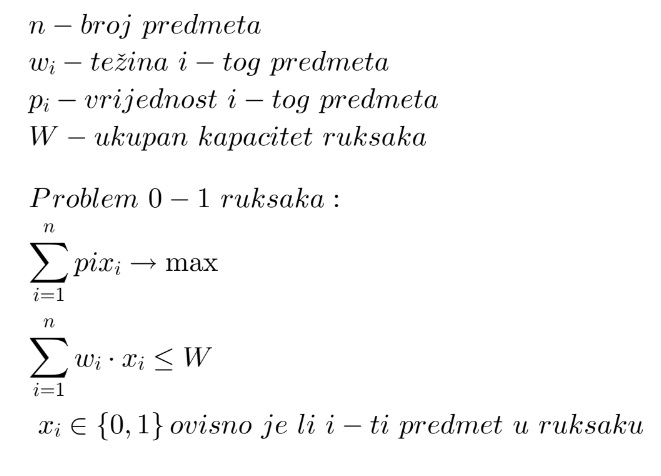
</div>

Sva rješenja problema prezentirana su konačnim binarnim nizom, odnosno poljem duljine n, gdje i-ti bit predstavlja uključenost i-tog predmeta u rješenje. Primjerice, niz bitova [ 0 1 0 0 1 1 0 ] prenosi informaciju da se u ruksaku nalaze drugi, peti i šesti predmet te da je ukupan broj predmeta na raspolaganju jednak sedam.

Rješavanje problema 0-1 ruksaka zanimljiv je optimizacijski problem, koji se često spominje kao kanonski primjer problema rješivog tehnikama dinamičkog programiranja. Međutim, naše ćemo razmatranje nastaviti sa višedimenzionalnim problemom ruksaka, koji se može shvatiti kao proširenje upravo opisanog <i>Knapsack</i> problema.

### Višedimenzionalni problem ruksaka